In [1]:
#Libraries

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# preparing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score

# modeling and evaluating
# from sklearn.linear_model import LinearRegression, LassoLars
# from sklearn.linear_model import TweedieRegressor
# from sklearn.feature_selection import RFE
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans


# Exploring
import scipy.stats as stats
import math

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
%matplotlib inline

# default pandas decimal number display format
# pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
import os
import env
import acquire
import wrangle_zillow

credentials loaded successfully
End of file.
Loaded zillow wrangle functions successfully.


In [3]:
pd.options.display.max_columns = 50

# Exercises

Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

1. Clustering with the Iris Dataset
    Using this lesson as a guide, perform clustering on the iris dataset.

    a. Choose features other than the ones used in the lesson.
    
    b. Visualize the results of your clustering.
    
    c. Use the elbow method to visually select a good value for k.
    
    d. Repeat the clustering, this time with 3 different features.

In [4]:
iris = sns.load_dataset('iris')

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# data split
train_and_validate, test = train_test_split(iris, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

# scale
scaler = StandardScaler()
# Defining which columns in the dataset need to be scaled (I would leave out categorical columns from this list, like zip code or fips code in the zillow data.)
cols = ['petal_length', 'sepal_length', 'petal_width', 'sepal_width']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

In [7]:
train.shape, train_scaled.shape

((121, 5), (121, 5))

In [8]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
41,4.5,2.3,1.3,0.3,setosa
142,5.8,2.7,5.1,1.9,virginica
82,5.8,2.7,3.9,1.2,versicolor
127,6.1,3.0,4.9,1.8,virginica
28,5.2,3.4,1.4,0.2,setosa


In [9]:
train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,species
41,-1.608304,-1.741994,-1.333104,-1.141286,setosa
142,-0.040855,-0.847906,0.796712,1.005974,virginica
82,-0.040855,-0.847906,0.124139,0.066547,versicolor
127,0.320864,-0.177340,0.684617,0.871770,virginica
28,-0.764293,0.716748,-1.277056,-1.275490,setosa


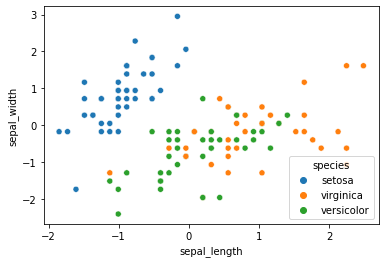

In [10]:
# Actual grouping

sns.scatterplot(data = train_scaled, x = 'sepal_length', y = 'sepal_width', hue = "species")
plt.show()

In [11]:
X = train_scaled[['petal_length', 'sepal_length']]

In [12]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

kmeans.predict(X)

array([1, 2, 2, 0, 1, 0, 3, 1, 3, 0, 2, 0, 1, 0, 0, 1, 2, 3, 1, 0, 2, 2,
       1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 3, 1, 1, 1, 1, 0, 1, 1, 2, 3, 0,
       0, 2, 1, 2, 2, 0, 2, 0, 0, 3, 3, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 3,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 3, 1, 1, 1, 0, 0, 2,
       2, 0, 3, 1, 2, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 0, 0, 2, 1, 2, 2, 0,
       3, 2, 2, 0, 0, 0, 1, 0, 1, 2, 1], dtype=int32)

In [13]:
pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)

,petal_length,sepal_length
0,0.767214,0.736523
1,-1.218460,-0.953373
2,0.292282,-0.269083
3,1.479476,1.954079


In [14]:
X.shape

(121, 2)

In [15]:
kmeans.labels_.shape

(121,)

In [16]:
train["cluster"] = kmeans.labels_

In [17]:
kmeans.inertia_

23.20252388950495

In [18]:
# Nice, so that's why we used the .copy() function above. Notice that the train_scaled df didn't get an extra column, since it doesn't refer to the original train dataframe, but a new one.

train.shape, train_scaled.shape

((121, 6), (121, 5))

In [19]:
train.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,6.444737,2.950000,5.047368,1.731579
1,5.043182,3.427273,1.504545,0.275000
2,5.610714,2.685714,4.200000,1.392857
3,7.454545,3.136364,6.318182,2.027273


<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

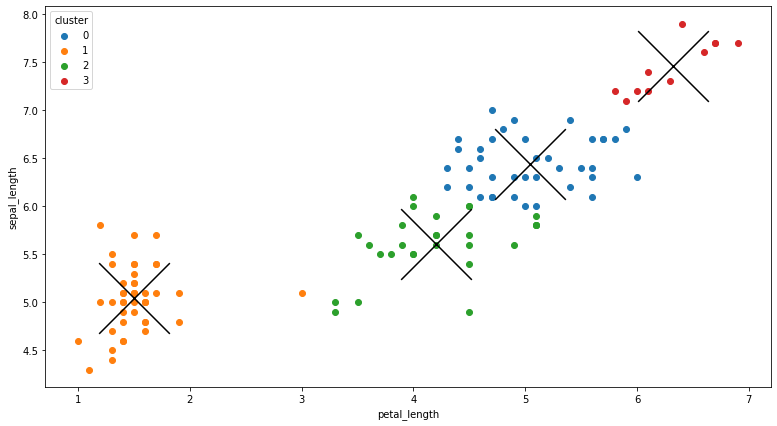

In [20]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.petal_length, subset.sepal_length, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='sepal length', xlabel='petal length')

train.groupby('cluster').mean().plot.scatter(y='sepal_length', x='petal_length', marker='x', s=5000, ax=ax, c='black')

####  Use the elbow method to visually select a good value for k.

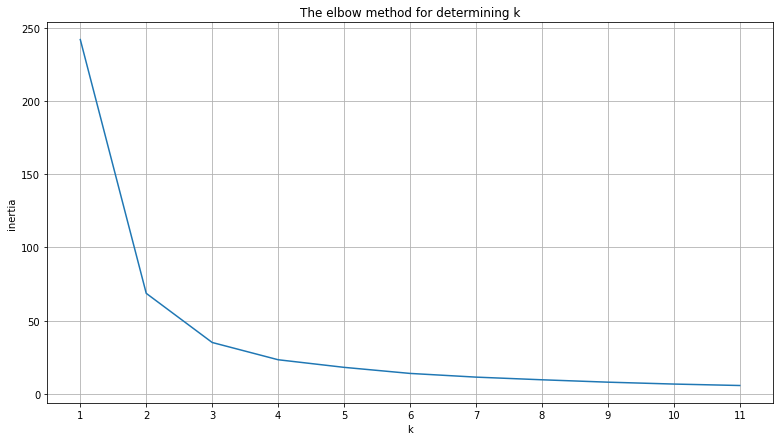

In [21]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

#### Takeaway:
3 or maybe 4 appears to be the point of diminishing returns for additional centroids. So we could try using 3, or leave it at 4. Both are about the same level of benefit base on this visual

#### d. Repeat the clustering, this time with 3 different features.

In [22]:
train_scaled2 = train_scaled.copy()
train2 = train.copy()
train2.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
41,4.5,2.3,1.3,0.3,setosa,1
142,5.8,2.7,5.1,1.9,virginica,2
82,5.8,2.7,3.9,1.2,versicolor,2
127,6.1,3.0,4.9,1.8,virginica,0
28,5.2,3.4,1.4,0.2,setosa,1


In [23]:
X2 = train_scaled2[['sepal_width', 'sepal_length', 'petal_length', 'petal_width']]
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(X2)

KMeans(n_clusters=3)

In [24]:
pd.DataFrame(kmeans2.cluster_centers_, columns = X2.columns)

,sepal_width,sepal_length,petal_length,petal_width
0,-0.924231,-0.070263,0.378404,0.348048
1,0.825910,-0.954967,-1.237953,-1.200586
2,0.064306,1.187685,1.019389,1.009601


In [25]:
# These should all be the same size.

X2.shape

(121, 4)

In [26]:
kmeans2.labels_.shape

(121,)

In [27]:
kmeans2.labels_

array([1, 0, 0, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 0, 2, 2,
       0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 2, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0, 0,
       0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0,
       2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1], dtype=int32)

In [28]:
train2["cluster"] = kmeans2.labels_

In [29]:
train2.shape, train_scaled2.shape

((121, 6), (121, 5))

In [30]:
train2.cluster.value_counts().sort_index()

0    41
1    43
2    37
Name: cluster, dtype: int64

In [31]:
train2.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,5.775610,2.665854,4.353659,1.409756
1,5.041860,3.448837,1.469767,0.255814
2,6.818919,3.108108,5.497297,1.902703


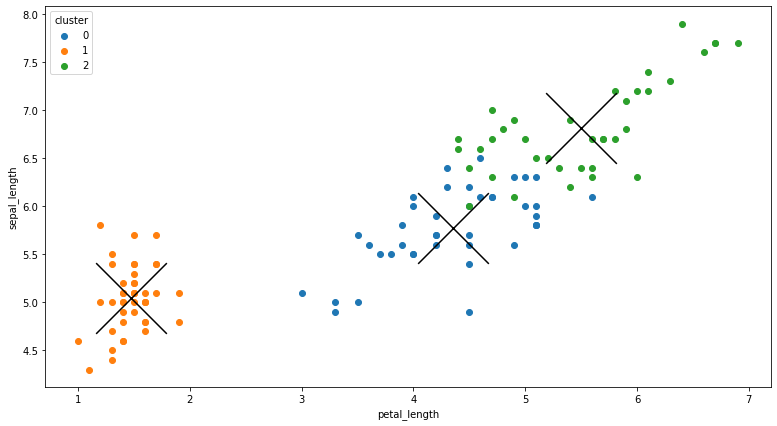

In [32]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train2.groupby('cluster'):
    ax.scatter(subset.petal_length, subset.sepal_length, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='sepal length', xlabel='petal length')

train2.groupby('cluster').mean().plot.scatter(y='sepal_length', x='petal_length', marker='x', s=5000, ax=ax, c='black')
plt.show()

Now using the elbow method to review number of clusters:

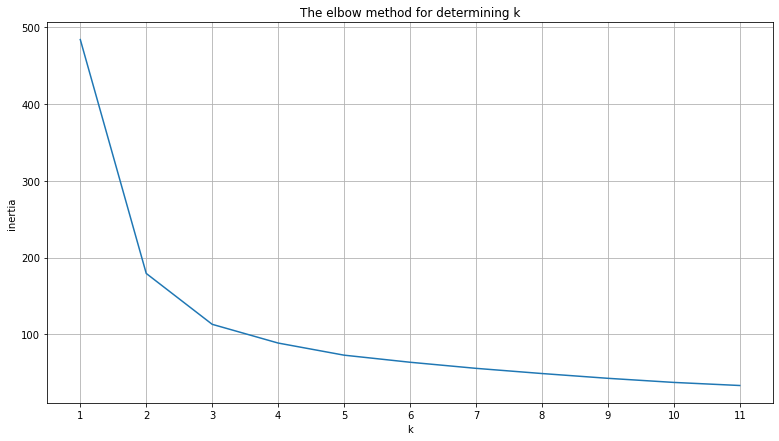

In [33]:
output = {}

for k in range(1, 12):
    kmeans2 = KMeans(n_clusters=k)
    kmeans2.fit(X2)
    output[k] = kmeans2.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

Confirms that 3-4 clusters is the optimal number of groups for this dataset.

### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [42]:
mall = acquire.get_mallcustomer_data()
mall.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [43]:
mall['is_male'] = pd.get_dummies(mall['gender'], drop_first=True)['Male']
mall.drop(columns=['gender'], inplace=True)

# split off test, 20% of original df size

train_validate, test = train_test_split(mall, test_size=.20, 
                                        random_state=42)

# split off validate, 30% of train_validate (24% of original)
train, validate = train_test_split(train_validate, test_size=.30, 
                                   random_state=42)

# create age bins
train['age_bin'] = pd.cut(train.age, [0, 41, 80])

train['income_bin'] = pd.cut(train.annual_income, [0, 40, 70, 140])

In [47]:
# scaling the train data
scaler_mall = StandardScaler()
mall_cols = ['age', 'annual_income', 'is_male', 'spending_score']
mall_train_scaled = train.copy()
mall_train_scaled[mall_cols] = scaler.fit_transform(train[mall_cols])

In [48]:
mall_train_scaled.head()

,age,annual_income,spending_score,is_male,age_bin,income_bin
customer_id,,,,,,
131,0.604040,0.394243,-1.597102,1.133893,"(41, 80]","(70, 140]"
63,2.032814,-0.491075,0.029038,-0.881917,"(41, 80]","(40, 70]"
14,-1.039050,-1.487057,0.974468,-0.881917,"(0, 41]","(0, 40]"
174,-0.181786,0.984455,1.541726,1.133893,"(0, 41]","(70, 140]"
145,-0.967612,0.615572,-1.483650,1.133893,"(0, 41]","(70, 140]"


Remember, my 'target' is `spending_score`, so I won't include that in my KMeans clustering model $(X)$.

In [49]:
X_mall = mall_train_scaled[['age', 'annual_income', 'is_male']]
mall_kmeans = KMeans(n_clusters = 4) # I'm guessing number of centriods on this first go-round
mall_kmeans.fit(X_mall)

KMeans(n_clusters=4)

1. Look at the model's output
2. interpretation
3. visualize

sidenote: sklearn objects that have properties with a `_` suffix, e.g. `kmeans.cluster_centers_` -- the `_` suffix means that the property was learned from the data

In [50]:
pd.DataFrame(mall_kmeans.cluster_centers_, columns = X_mall.columns)

,age,annual_income,is_male
0,-0.519746,0.774475,1.133893
1,-0.687352,-1.216070,-0.106605
2,1.485117,-0.406539,0.209980
3,-0.118285,0.589956,-0.881917


In [54]:
X_mall.shape, mall_kmeans.labels_.shape

((112, 3), (112,))

In [56]:
# Adding the clustering labels back onto the train db:

train["cluster"] = mall_kmeans.labels_
train.head()

,age,annual_income,spending_score,is_male,age_bin,income_bin,cluster
customer_id,,,,,,,
131,47,71,9,1,"(41, 80]","(70, 140]",0
63,67,47,52,0,"(41, 80]","(40, 70]",2
14,24,20,77,0,"(0, 41]","(0, 40]",1
174,36,87,92,1,"(0, 41]","(70, 140]",0
145,25,77,12,1,"(0, 41]","(70, 140]",0


In [57]:
train.groupby("cluster").mean()

,age,annual_income,spending_score,is_male
cluster,,,,
0,31.269231,81.307692,48.346154,1.000000
1,28.923077,27.346154,56.730769,0.384615
2,59.333333,49.291667,40.458333,0.541667
3,36.888889,76.305556,56.527778,0.000000


Visualizing age vs spending score

<AxesSubplot:xlabel='age', ylabel='spending_score'>

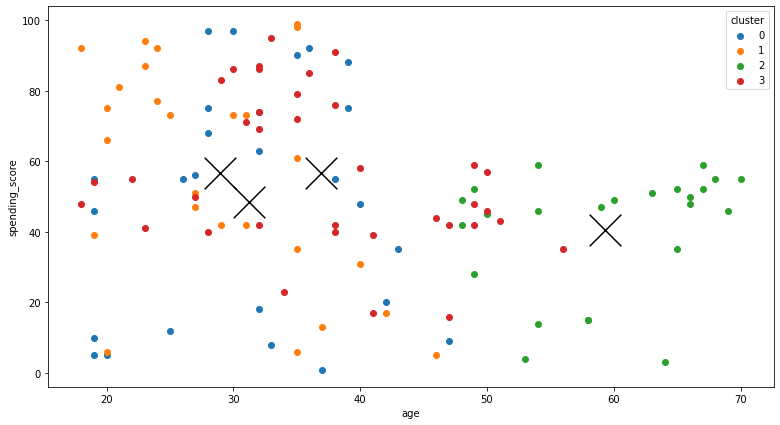

In [67]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.age, subset.spending_score, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='Spending Score', xlabel='Age')

train.groupby('cluster').mean().plot.scatter(y='spending_score', x='age', marker='x', s=1000, ax=ax, c='black')

Visualizing annual income vs spending score

<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

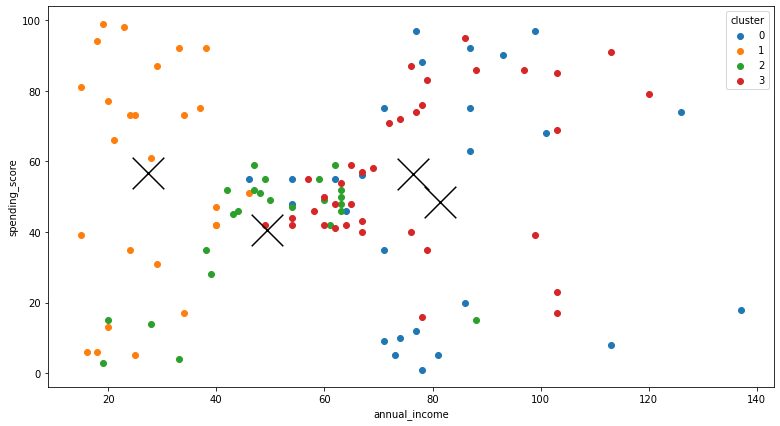

In [68]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.annual_income, subset.spending_score, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='Spending Score', xlabel='Annual Income')

train.groupby('cluster').mean().plot.scatter(y='spending_score', x='annual_income', marker='x', s=1000, ax=ax, c='black')

In [71]:
mall_kmeans.inertia_

# Seems like a big number...

129.93210956655184

#### Elbow Method

1. Choose a range of k values
1. Create a model for each k and record **inertia**
1. Visualize results (k vs inertia)

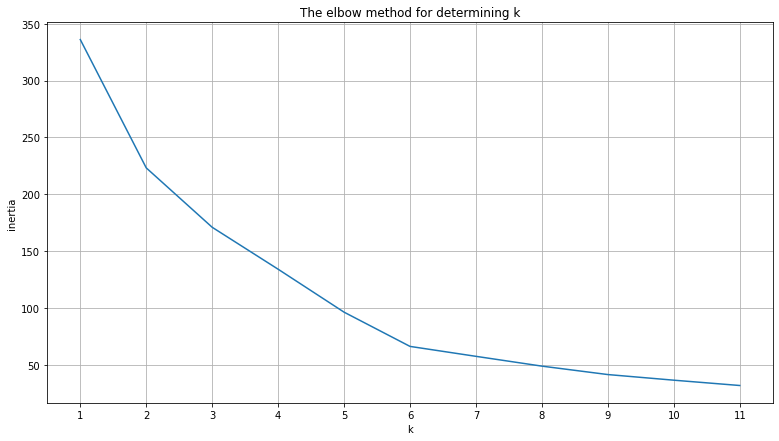

In [72]:
output = {}

for k in range(1, 12):
    mall_kmeans = KMeans(n_clusters=k)
    mall_kmeans.fit(X_mall)
    output[k] = mall_kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

#### Takeaway:

- According to this Elbow Method test, I should be using 6 centriods to better cluster the data. That makes sense by looking at the scatter charts, since the blue and red groups appear to be overlapping, implying that the data could be further divided and still add value to the analysis.

### 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

In [73]:
train.describe()

,age,annual_income,spending_score,is_male,cluster
count,112.000000,112.000000,112.000000,112.000000,112.000000
mean,38.544643,60.312500,51.232143,0.437500,1.625000
std,14.060928,27.230756,26.561837,0.498308,1.163445
min,18.000000,15.000000,1.000000,0.000000,0.000000
25%,28.000000,39.750000,38.000000,0.000000,1.000000
50%,35.000000,62.000000,50.000000,0.000000,2.000000
75%,49.000000,77.250000,73.000000,1.000000,3.000000
max,70.000000,137.000000,99.000000,1.000000,3.000000


In [74]:
mall_train_scaled.describe()

,age,annual_income,spending_score,is_male
count,1.120000e+02,112.000000,1.120000e+02,1.120000e+02
mean,2.279922e-16,0.000000,1.367953e-16,-8.524927e-17
std,1.004494e+00,1.004494,1.004494e+00,1.004494e+00
min,-1.467683e+00,-1.671498,-1.899639e+00,-8.819171e-01
25%,-7.532956e-01,-0.758514,-5.004026e-01,-8.819171e-01
50%,-2.532247e-01,0.062249,-4.659620e-02,-8.819171e-01
75%,7.469171e-01,0.624794,8.231995e-01,1.133893e+00
max,2.247130e+00,2.828866,1.806447e+00,1.133893e+00
